# Clipando e classificando notícias automaticamente - (Por repórter e site)
Objetivo: Automatizar a raspagens de notícias produzidas por **dez repórteres** que trabalharam para **dez veículos diferentes e são bolsistas do Programa de Diversidade nas Redações da Énois Laboratório de Jornalismo.**

Desafio: O programa é bem extenso, tem um ano de duração, então seria impossível arquivar essas produções coletando as reportagens na mão. Os sites tem estruturas bem diferentes entre si, o que dificultava uma busca busca automatizada com apenas um tipo de código.

A solução foi o site do Google News como base para localizar as matérias, já que o serviço que cria um arquivo XML de um feed de notícias RSS (como uma forma de padronizar o código) e a biblioteca GoogleNews para definir os termos de busca.


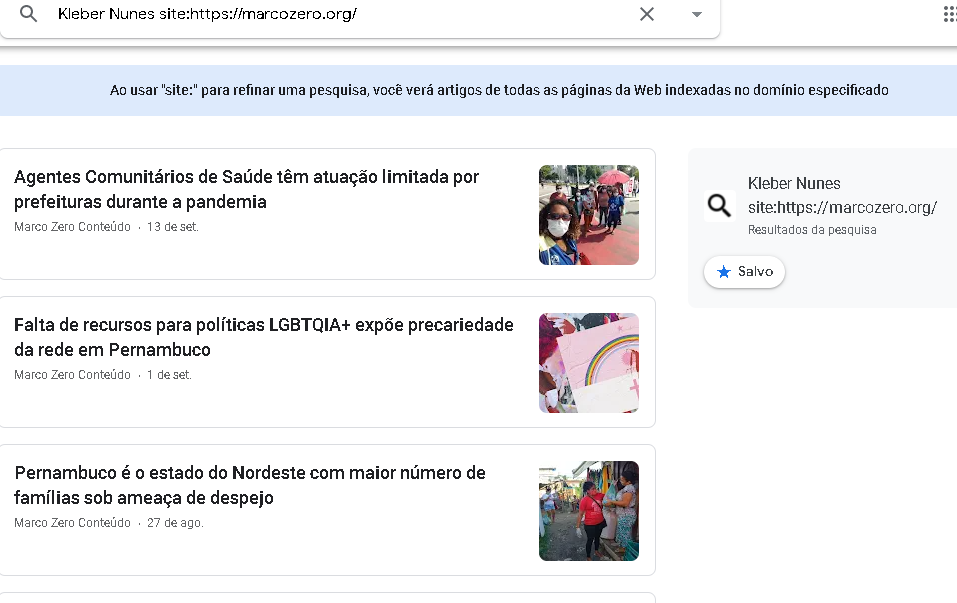

# Bibliotecas usadas

[Pandas](hhttps://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)

[Google News](https://github.com/Iceloof/GoogleNews)

In [6]:
!pip install GoogleNews

In [7]:
from GoogleNews import GoogleNews
googlenews = GoogleNews()

In [8]:
import pandas as pd

In [9]:
googlenews.set_lang('pt-br') #aqui delimitamos o idioma que queremos buscar 

In [10]:
googlenews.set_time_range(start='15/10/2020', end='30/10/2021') #essa função delimita a data de busca

# Definindo os parâmetros de busca
Escolhemos então os repórteres e sites que queremos raspar as notícias. É possível fazer uma única lista de termos, ou fazer com que o programa leia os termos a partir de um csv, mas isso fica para um próximo tutorial. =)

In [11]:
googlenews.get_news("'Kleber Nunes' site:marcozero.org")

In [12]:
googlenews.get_news("'Gabryella Garcia' 'site:https://eshoje.com.br'")

In [13]:
googlenews.get_news("'Aubrey Effgen' 'site:https://eshoje.com.br'")

In [14]:
googlenews.get_news("'Rose Serafim' 'site:https://www.saibamais.jor.br/'")

In [15]:
googlenews.get_news("'Ester Caetano' 'site:https://www.nonada.com.br/'")

In [16]:
googlenews.get_news("'Jordânia Andrade' 'site:https://bhaz.com.br/'")

In [17]:
googlenews.get_news("'Thais Rodrigues' 'site:https://congressoemfoco.uol.com.br/'")

In [18]:
googlenews.get_news("'Giorgia Prates' 'site:https://www.plural.jor.br/'")

In [19]:
googlenews.get_news("'Alice Sousa' 'site:https://www.opovo.com.br/'")

In [20]:
googlenews.get_news("'Natali Carvalho' 'site:https://diariodonordeste.verdesmares.com.br/'")

In [21]:
googlenews.get_news("'Andressa Marques' 'site:https://sul21.com.br/'")

In [22]:
resultado = googlenews.result()
df = pd.DataFrame(resultado)

In [23]:
df #vamos ver o que o programa retorna

,title,desc,date,datetime,link,img,media,site
0,Agentes Comunitários de Saúde têm atuação limi...,bookmark_border,13 de set.,None,news.google.com/./articles/CBMibGh0dHBzOi8vbWF...,https://lh3.googleusercontent.com/proxy/X0WIIe...,None,Marco Zero Conteúdo
1,ONU vai investigar 'ataques químicos' contra c...,bookmark_border,20 de ago.,None,news.google.com/./articles/CBMiZmh0dHBzOi8vbWF...,https://lh3.googleusercontent.com/proxy/7pVMv6...,None,Marco Zero Conteúdo
2,Pernambuco é o estado do Nordeste com maior nú...,bookmark_border,27 de ago.,None,news.google.com/./articles/CBMia2h0dHBzOi8vbWF...,https://lh3.googleusercontent.com/proxy/W9bSEL...,None,Marco Zero Conteúdo
3,A cada 10 mortes de bebês por sífilis congênit...,bookmark_border,25 de ago.,None,news.google.com/./articles/CBMiaWh0dHBzOi8vbWF...,https://lh3.googleusercontent.com/proxy/O4Qm3U...,None,Marco Zero Conteúdo
4,Falta de recursos para políticas LGBTQIA+ expõ...,bookmark_border,1 de set.,None,news.google.com/./articles/CBMiaWh0dHBzOi8vbWF...,https://lh3.googleusercontent.com/proxy/jlsGhi...,None,Marco Zero Conteúdo
5,"Com políticas públicas esvaziadas, PE enfrenta...",bookmark_border,1 de set.,None,news.google.com/./articles/CBMiYWh0dHBzOi8vbWF...,https://lh3.googleusercontent.com/proxy/9n64NF...,None,Marco Zero Conteúdo
6,"Supermercado abre as portas na Serra, mas está...",bookmark_border,27 de jul.,None,news.google.com/./articles/CBMiXWh0dHBzOi8vZXN...,https://lh3.googleusercontent.com/proxy/dOIiDh...,None,ES Hoje
7,Camata tentou se manter afastado e mudou de en...,bookmark_border,3 de ago.,None,news.google.com/./articles/CBMie2h0dHBzOi8vZXN...,https://lh3.googleusercontent.com/proxy/zjHn6S...,None,ES Hoje
8,Tribunal de Contas do ES previne gasto ilegal ...,bookmark_border,25 de ago.,None,news.google.com/./articles/CBMiYmh0dHBzOi8vZXN...,https://lh3.googleusercontent.com/proxy/iQYDds...,None,ES Hoje
9,Covid-19: ES é 8º Estado mais mortal por 100 m...,bookmark_border,7 de jul.,None,news.google.com/./articles/CBMiWGh0dHBzOi8vZXN...,https://lh3.googleusercontent.com/proxy/JfwmT6...,None,ES Hoje


# Classificando as notícias
Vamos criar uma função para classificar algumas notícias com base em termos de interesse do **Programa de Diversidade** e o título das matérias. 

In [24]:
#criamos uma lista de termos de interesse
termos = ["LGBT", "Indígenas", "Saúde", "Educação", "Mulheres", "Gênero", "Território"]
#Dai pra cada termo da lista, criamos uma coluna com o nome do termo e valor = 0
for termo in termos:
  df[termo] = 0
  df.loc[df['title'].str.contains(termo), termo] = 1 # modifica o valor da coluna para 1, caso o título contenha o termo de interesse
  

In [25]:
df

,title,desc,date,datetime,link,img,media,site,LGBT,Indígenas,Saúde,Educação,Mulheres,Gênero,Território
0,Agentes Comunitários de Saúde têm atuação limi...,bookmark_border,13 de set.,None,news.google.com/./articles/CBMibGh0dHBzOi8vbWF...,https://lh3.googleusercontent.com/proxy/X0WIIe...,None,Marco Zero Conteúdo,0,0,1,0,0,0,0
1,ONU vai investigar 'ataques químicos' contra c...,bookmark_border,20 de ago.,None,news.google.com/./articles/CBMiZmh0dHBzOi8vbWF...,https://lh3.googleusercontent.com/proxy/7pVMv6...,None,Marco Zero Conteúdo,0,0,0,0,0,0,0
2,Pernambuco é o estado do Nordeste com maior nú...,bookmark_border,27 de ago.,None,news.google.com/./articles/CBMia2h0dHBzOi8vbWF...,https://lh3.googleusercontent.com/proxy/W9bSEL...,None,Marco Zero Conteúdo,0,0,0,0,0,0,0
3,A cada 10 mortes de bebês por sífilis congênit...,bookmark_border,25 de ago.,None,news.google.com/./articles/CBMiaWh0dHBzOi8vbWF...,https://lh3.googleusercontent.com/proxy/O4Qm3U...,None,Marco Zero Conteúdo,0,0,0,0,0,0,0
4,Falta de recursos para políticas LGBTQIA+ expõ...,bookmark_border,1 de set.,None,news.google.com/./articles/CBMiaWh0dHBzOi8vbWF...,https://lh3.googleusercontent.com/proxy/jlsGhi...,None,Marco Zero Conteúdo,1,0,0,0,0,0,0
5,"Com políticas públicas esvaziadas, PE enfrenta...",bookmark_border,1 de set.,None,news.google.com/./articles/CBMiYWh0dHBzOi8vbWF...,https://lh3.googleusercontent.com/proxy/9n64NF...,None,Marco Zero Conteúdo,0,0,0,0,0,0,0
6,"Supermercado abre as portas na Serra, mas está...",bookmark_border,27 de jul.,None,news.google.com/./articles/CBMiXWh0dHBzOi8vZXN...,https://lh3.googleusercontent.com/proxy/dOIiDh...,None,ES Hoje,0,0,0,0,0,0,0
7,Camata tentou se manter afastado e mudou de en...,bookmark_border,3 de ago.,None,news.google.com/./articles/CBMie2h0dHBzOi8vZXN...,https://lh3.googleusercontent.com/proxy/zjHn6S...,None,ES Hoje,0,0,0,0,0,0,0
8,Tribunal de Contas do ES previne gasto ilegal ...,bookmark_border,25 de ago.,None,news.google.com/./articles/CBMiYmh0dHBzOi8vZXN...,https://lh3.googleusercontent.com/proxy/iQYDds...,None,ES Hoje,0,0,0,0,0,0,0
9,Covid-19: ES é 8º Estado mais mortal por 100 m...,bookmark_border,7 de jul.,None,news.google.com/./articles/CBMiWGh0dHBzOi8vZXN...,https://lh3.googleusercontent.com/proxy/JfwmT6...,None,ES Hoje,0,0,0,0,0,0,0


# Limpando colunas que não preciso usar

In [27]:
df.drop(columns=['desc', 'datetime', 'media'])

,title,date,link,img,site,LGBT,Indígenas,Saúde,Educação,Mulheres,Gênero,Território
0,Agentes Comunitários de Saúde têm atuação limi...,13 de set.,news.google.com/./articles/CBMibGh0dHBzOi8vbWF...,https://lh3.googleusercontent.com/proxy/X0WIIe...,Marco Zero Conteúdo,0,0,1,0,0,0,0
1,ONU vai investigar 'ataques químicos' contra c...,20 de ago.,news.google.com/./articles/CBMiZmh0dHBzOi8vbWF...,https://lh3.googleusercontent.com/proxy/7pVMv6...,Marco Zero Conteúdo,0,0,0,0,0,0,0
2,Pernambuco é o estado do Nordeste com maior nú...,27 de ago.,news.google.com/./articles/CBMia2h0dHBzOi8vbWF...,https://lh3.googleusercontent.com/proxy/W9bSEL...,Marco Zero Conteúdo,0,0,0,0,0,0,0
3,A cada 10 mortes de bebês por sífilis congênit...,25 de ago.,news.google.com/./articles/CBMiaWh0dHBzOi8vbWF...,https://lh3.googleusercontent.com/proxy/O4Qm3U...,Marco Zero Conteúdo,0,0,0,0,0,0,0
4,Falta de recursos para políticas LGBTQIA+ expõ...,1 de set.,news.google.com/./articles/CBMiaWh0dHBzOi8vbWF...,https://lh3.googleusercontent.com/proxy/jlsGhi...,Marco Zero Conteúdo,1,0,0,0,0,0,0
5,"Com políticas públicas esvaziadas, PE enfrenta...",1 de set.,news.google.com/./articles/CBMiYWh0dHBzOi8vbWF...,https://lh3.googleusercontent.com/proxy/9n64NF...,Marco Zero Conteúdo,0,0,0,0,0,0,0
6,"Supermercado abre as portas na Serra, mas está...",27 de jul.,news.google.com/./articles/CBMiXWh0dHBzOi8vZXN...,https://lh3.googleusercontent.com/proxy/dOIiDh...,ES Hoje,0,0,0,0,0,0,0
7,Camata tentou se manter afastado e mudou de en...,3 de ago.,news.google.com/./articles/CBMie2h0dHBzOi8vZXN...,https://lh3.googleusercontent.com/proxy/zjHn6S...,ES Hoje,0,0,0,0,0,0,0
8,Tribunal de Contas do ES previne gasto ilegal ...,25 de ago.,news.google.com/./articles/CBMiYmh0dHBzOi8vZXN...,https://lh3.googleusercontent.com/proxy/iQYDds...,ES Hoje,0,0,0,0,0,0,0
9,Covid-19: ES é 8º Estado mais mortal por 100 m...,7 de jul.,news.google.com/./articles/CBMiWGh0dHBzOi8vZXN...,https://lh3.googleusercontent.com/proxy/JfwmT6...,ES Hoje,0,0,0,0,0,0,0


In [28]:
df.to_csv("noticias_diversidade.csv")